In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])

In [3]:
cancer.data.shape

(569, 30)

In [4]:
X_w_noise.shape

(569, 80)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state = 0, test_size = .5)

In [6]:
print(X_train.shape, X_test.shape)

(284, 80) (285, 80)


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9403508771929825

In [9]:
from sklearn.svm import LinearSVC
lr = LinearSVC()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9368421052631579

In [10]:
select = SelectPercentile(score_func = f_classif, percentile = 37.5)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print(X_train.shape, X_train_selected.shape)

(284, 80) (284, 30)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True False  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
  True  True False  True False False False False] (80,)


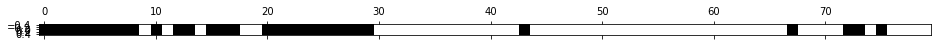

In [11]:
# 80개의 특성 중, SelectPercentile함수가 어떤 것을 선택했는지 알아보기.
# 노이즈 특성이 추가된 데이터이므로, 30개 이후의 데이터들은 랜덤 데이터들임.
# 대부분은 원래 특성인 30개 중 선택하였지만, 랜덤으로 만들어진 노이즈 데이터를 선택하는 경우도 있음.
mask = select.get_support()
print(mask, mask.shape)
import matplotlib.pyplot as plt
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')

In [14]:
# 특성 선택 이전보다 정확도 지수가 조금 더 올라간 것을 확인 가능하다.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 5000)
lr.fit(X_train_selected, y_train)
lr.score(X_test_selected, y_test)

NameError: name 'X_test_selected' is not defined

In [13]:
from sklearn.svm import LinearSVC
lr = LinearSVC()
lr.fit(X_train_selected, y_train)
lr.score(X_test_selected, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


NameError: name 'X_test_selected' is not defined

In [15]:
import mglearn

In [16]:
citibike = mglearn.datasets.load_citibike()

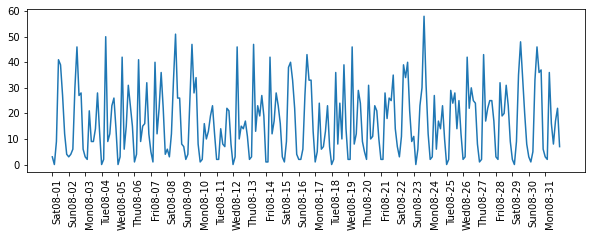

In [17]:
import pandas as pd
plt.figure(figsize = (10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq = 'd')
week = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"), xticks.strftime("%m-%d"))]
plt.xticks(xticks, xticks_name, rotation = 90, ha = "left")
plt.plot(citibike)
plt.show()

In [18]:
# 타깃 값 추출 (대여 횟수)
y = citibike.values

# dataindex 형태로 되어 있던 citibike 데이터를 정수로 변환하여 array 형태로 변환.
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [19]:
n_train = 8*23 # 184
def eval_on_features(features, target, regressor):
    
    X_train, X_test = features[:n_train], features[n_train:]
    
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print("score:{:.2f}".format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize = (10, 3))
    
    plt.xticks(range(0, len(X), 8), xticks_name, rotation = 90, ha = "left")
    
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, n_train+len(y_test)), y_test, label = "test")
    
    plt.plot(range(n_train), y_pred_train, '--', label="pred_train")
    plt.plot(range(n_train,  n_train+ len(y_test)), y_pred, '--', label = "pred_test")
    
    plt.legend(loc = (1.01, 0))

score:-0.04


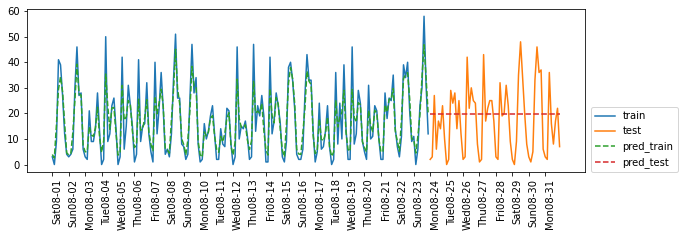

In [20]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
eval_on_features(X, y, reg)

score:0.60


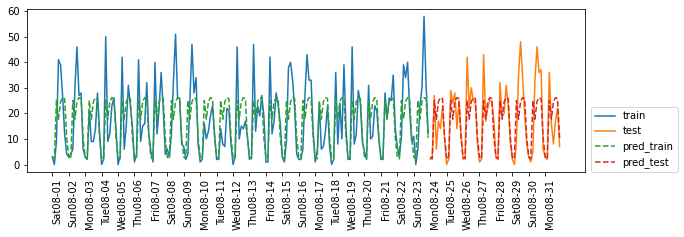

In [21]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, reg)

score:0.84


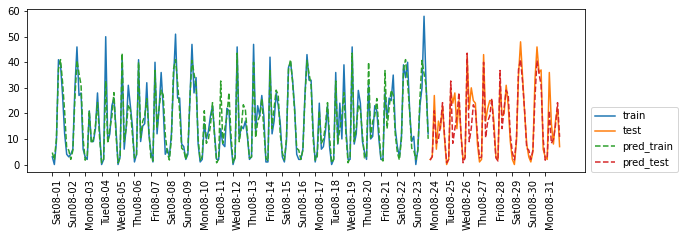

In [22]:
X_dayofweek = citibike.index.dayofweek.values.reshape(-1, 1)
X_hour = citibike.index.hour.values.reshape(-1, 1)
X_hour_week = np.hstack([X_dayofweek, X_hour])
eval_on_features(X_hour_week, y, reg)

score:0.13


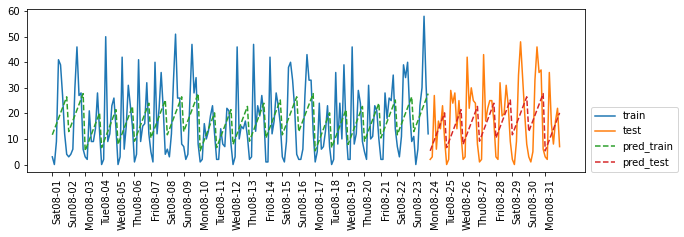

In [23]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

score:0.62


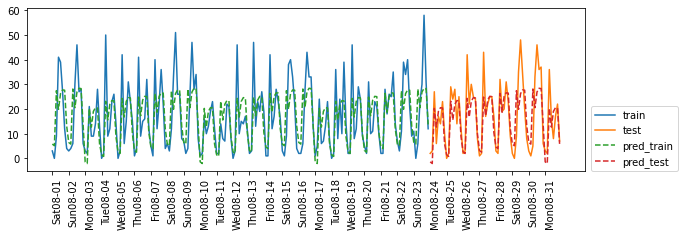

In [34]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_hour_week_onehot =enc.fit_transform(X_hour_week).toarray()


eval_on_features(X_hour_week_onehot, y, Ridge())

In [32]:
X_hour_week.shape

(248, 2)

In [33]:
X_hour_week_onehot.shape

(248, 15)

score:0.85


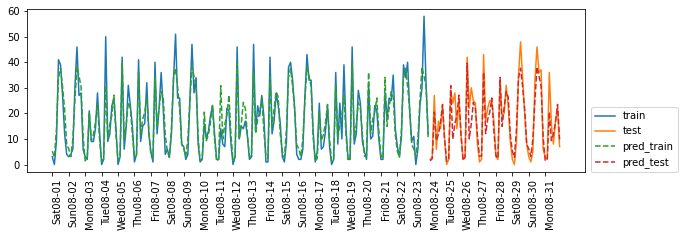

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [26]:
hour = ["%02d:00"%i for i in range(0, 24, 3)]
day = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
features = day + hour

In [27]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

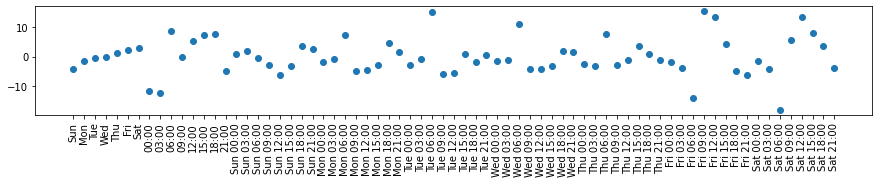

In [30]:
plt.figure(figsize = (15, 2))
plt.plot(coef_nonzero, "o")
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation = 90);

In [175]:
len(coef_nonzero)

71

In [176]:
7+8+31*8

263